In [1]:
%matplotlib inline

## Setup GPU Device

In [2]:
import os
#Set GPU IDs for training:
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [3]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

## Choose Number of Training Samples

In [4]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = 'training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
np.random.seed(1)
sample_size = 2
# training_idx = np.random.randint(4,64,10)
training_idx_1 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
training_idx_2 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
training_idx_3 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
training_idx_4 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
# training_idx_1 = [6,9]
# training_idx_2 = [6,9]
# training_idx_3 = [6,9]
# training_idx_4 = [6,9]
print(training_idx_1,training_idx_2,training_idx_3,training_idx_4)

[43 45] [32 47] [33 45] [61 53]


## Prepare Training and Test Data

In [5]:
for idx in range(len(training_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(training_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(training_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(training_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(training_idx_4[idx])+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])

for i in labels:
    i[0] = int(i[0])

print(labels)

[[1], [0], [2], [3], [1], [0], [2], [3]]


## Visualize Training Data

In [6]:
# graph = trainset[14]
# label=labels[14][0]

# fig, ax = plt.subplots()
# G=graph.to_networkx()
# pos=nx.spring_layout(G)
# nx.draw(G,pos)
# nx.draw_networkx_labels(G,pos, ax=ax)
# ax.set_title('Class: {:f}'.format(label))
# plt.show()

## Apply random shuffle to training set

In [7]:
##apply random shuffle on the trainset
np.random.seed(0)
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [8]:
len(trainset_shuffled)

8

In [9]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [10]:
import dgl.function as fn
import torch
import torch.nn as nn

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

## Readout and classification

In [11]:
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

## Setup and training

In [12]:
import torch.optim as optim
from torch.utils.data import DataLoader

In [13]:
# Create model
#model = Classifier(1, 256, trainset.num_classes)
model = Classifier(1, 256, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []
for epoch in range(1000):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)
    
#     if (epoch%5==0):
#         model.eval()
#         eval_bg = dgl.batch(trainset_shuffled)
#         eval_labels = torch.tensor(labels_shuffled).float().view(-1, 1)
#         probs_Y = torch.softmax(model(eval_bg), 1)
#         argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

#         print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
#             (eval_labels == argmax_Y.float()).sum().item() / len(eval_labels) * 100))

Epoch 0, loss 2.0582
Epoch 1, loss 1.3418
Epoch 2, loss 1.4378
Epoch 3, loss 1.4710
Epoch 4, loss 1.4569
Epoch 5, loss 1.4265
Epoch 6, loss 1.4041
Epoch 7, loss 1.3978
Epoch 8, loss 1.3987
Epoch 9, loss 1.3979
Epoch 10, loss 1.3926
Epoch 11, loss 1.3853
Epoch 12, loss 1.3783
Epoch 13, loss 1.3721
Epoch 14, loss 1.3651
Epoch 15, loss 1.3583
Epoch 16, loss 1.3509
Epoch 17, loss 1.3433
Epoch 18, loss 1.3344
Epoch 19, loss 1.3252
Epoch 20, loss 1.3151
Epoch 21, loss 1.3048
Epoch 22, loss 1.2940
Epoch 23, loss 1.2831
Epoch 24, loss 1.2717
Epoch 25, loss 1.2605
Epoch 26, loss 1.2481
Epoch 27, loss 1.2362
Epoch 28, loss 1.2242
Epoch 29, loss 1.2109
Epoch 30, loss 1.1992
Epoch 31, loss 1.1850
Epoch 32, loss 1.1729
Epoch 33, loss 1.1595
Epoch 34, loss 1.1451
Epoch 35, loss 1.1344
Epoch 36, loss 1.1186
Epoch 37, loss 1.1047
Epoch 38, loss 1.0913
Epoch 39, loss 1.0779
Epoch 40, loss 1.0646
Epoch 41, loss 1.0506
Epoch 42, loss 1.0377
Epoch 43, loss 1.0250
Epoch 44, loss 1.0128
Epoch 45, loss 1.002

Epoch 363, loss 0.3138
Epoch 364, loss 0.3133
Epoch 365, loss 0.3126
Epoch 366, loss 0.3123
Epoch 367, loss 0.3115
Epoch 368, loss 0.3110
Epoch 369, loss 0.3106
Epoch 370, loss 0.3100
Epoch 371, loss 0.3094
Epoch 372, loss 0.3089
Epoch 373, loss 0.3083
Epoch 374, loss 0.3079
Epoch 375, loss 0.3072
Epoch 376, loss 0.3067
Epoch 377, loss 0.3062
Epoch 378, loss 0.3055
Epoch 379, loss 0.3075
Epoch 380, loss 0.3041
Epoch 381, loss 0.3039
Epoch 382, loss 0.3032
Epoch 383, loss 0.3025
Epoch 384, loss 0.3019
Epoch 385, loss 0.3014
Epoch 386, loss 0.3008
Epoch 387, loss 0.3001
Epoch 388, loss 0.2998
Epoch 389, loss 0.2989
Epoch 390, loss 0.2985
Epoch 391, loss 0.2979
Epoch 392, loss 0.2972
Epoch 393, loss 0.2967
Epoch 394, loss 0.2962
Epoch 395, loss 0.2954
Epoch 396, loss 0.2951
Epoch 397, loss 0.2942
Epoch 398, loss 0.2938
Epoch 399, loss 0.2930
Epoch 400, loss 0.2924
Epoch 401, loss 0.2920
Epoch 402, loss 0.2911
Epoch 403, loss 0.2908
Epoch 404, loss 0.2899
Epoch 405, loss 0.2894
Epoch 406, 

Epoch 720, loss 0.0544
Epoch 721, loss 0.0556
Epoch 722, loss 0.0536
Epoch 723, loss 0.0549
Epoch 724, loss 0.0528
Epoch 725, loss 0.0541
Epoch 726, loss 0.0520
Epoch 727, loss 0.0534
Epoch 728, loss 0.0513
Epoch 729, loss 0.0527
Epoch 730, loss 0.0506
Epoch 731, loss 0.0518
Epoch 732, loss 0.0500
Epoch 733, loss 0.0509
Epoch 734, loss 0.0493
Epoch 735, loss 0.0502
Epoch 736, loss 0.0487
Epoch 737, loss 0.0494
Epoch 738, loss 0.0479
Epoch 739, loss 0.0488
Epoch 740, loss 0.0472
Epoch 741, loss 0.0483
Epoch 742, loss 0.0465
Epoch 743, loss 0.0478
Epoch 744, loss 0.0458
Epoch 745, loss 0.0470
Epoch 746, loss 0.0452
Epoch 747, loss 0.0463
Epoch 748, loss 0.0446
Epoch 749, loss 0.0456
Epoch 750, loss 0.0439
Epoch 751, loss 0.0450
Epoch 752, loss 0.0432
Epoch 753, loss 0.0445
Epoch 754, loss 0.0426
Epoch 755, loss 0.0438
Epoch 756, loss 0.0420
Epoch 757, loss 0.0433
Epoch 758, loss 0.0414
Epoch 759, loss 0.0427
Epoch 760, loss 0.0409
Epoch 761, loss 0.0420
Epoch 762, loss 0.0404
Epoch 763, 

## Finish Training

## Plot Loss

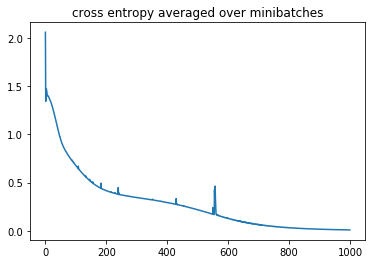

In [14]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

In [15]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([4, 256])

## Get Testset data

In [16]:
testset = []
test_labels = []
test_dir = 'test_data'

testing_idx_1=[]
testing_idx_2=[]
testing_idx_3=[]
testing_idx_4=[]
for i in range(4,65):
    if i not in training_idx_1:
        testing_idx_1.append(i)
    if i not in training_idx_2:
        testing_idx_2.append(i)
    if i not in training_idx_3:
        testing_idx_3.append(i)
    if i not in training_idx_4:
        testing_idx_4.append(i)
        
print(testing_idx_1)
print(training_idx_1)
print(testing_idx_2)
print(training_idx_2)
print(testing_idx_3)
print(training_idx_3)
print(testing_idx_4)
print(training_idx_4)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[43 45]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[32 47]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[33 45]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64]
[61 53]


In [17]:
for idx in range(len(testing_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(testing_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(testing_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(testing_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(testing_idx_4[idx])+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

print(test_labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3],

In [18]:
##apply random shuffle on the testset    
np.random.seed(0)
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

## Test on Testset

In [19]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
probs_Y = torch.softmax(model(test_bg), 1)

sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_labels == argmax_Y.float()).sum().item() / len(test_labels) * 100))

zip(model(test_bg),(test_labels))
for i1,i2 in zip(probs_Y,(test_labels)):
    print(i1,i2)
# print(torch.max(probs_Y, 1))

Accuracy of sampled predictions on the test set: 97.8814%
Accuracy of argmax predictions on the test set: 99.152542%
tensor([9.5540e-01, 5.9598e-06, 4.4381e-05, 4.4553e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([1.5355e-07, 9.9853e-01, 7.5367e-12, 1.4700e-03], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([7.1741e-05, 1.5706e-39, 9.9993e-01, 3.7723e-10], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([7.7259e-03, 5.8947e-03, 4.9641e-06, 9.8637e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([9.4397e-01, 1.7023e-05, 3.5775e-05, 5.5981e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([1.1613e-02, 1.2350e-03, 1.1139e-05, 9.8714e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([6.4431e-05, 3.3700e-40, 9.9994e-01, 2.1159e-10], devi

tensor([7.2869e-03, 7.8766e-03, 4.3133e-06, 9.8483e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([1.7777e-03, 6.3301e-29, 9.9822e-01, 2.9312e-06], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([1.5621e-07, 9.9829e-01, 8.6693e-12, 1.7142e-03], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([9.3521e-03, 2.4044e-03, 7.7480e-06, 9.8824e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([6.9789e-03, 1.0804e-02, 3.7335e-06, 9.8221e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([9.8534e-01, 1.0250e-05, 1.2362e-05, 1.4634e-02], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([7.7259e-03, 5.8947e-03, 4.9641e-06, 9.8637e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([1.5337e-07, 9.9855e-01, 7.4624e-1

In [20]:
(test_labels != argmax_Y.float()).nonzero()

tensor([[ 79,   0],
        [117,   0]], device='cuda:0')

## Finish Testing

In [21]:
probs_Y[79],test_labels[79]

(tensor([1.7754e-03, 8.2476e-01, 8.5223e-08, 1.7346e-01], device='cuda:0',
        grad_fn=<SelectBackward>), tensor([3.], device='cuda:0'))

In [31]:
import tsne

#m = trainset[0].adjacency_matrix()
m = model(test_bg).cpu().data.numpy()


In [32]:
Y = tsne.tsne(m, 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 240...
Mean value of sigma: 1.391114
Iteration 10: error is 10.119028
Iteration 20: error is 8.529243
Iteration 30: error is 8.276184
Iteration 40: error is 8.183038
Iteration 50: error is 8.419083
Iteration 60: error is 8.450854
Iteration 70: error is 8.353728
Iteration 80: error is 8.481968
Iteration 90: error is 8.254655
Iteration 100: error is 8.599051
Iteration 110: error is 0.504397
Iteration 120: error is 0.311778
Iteration 130: error is 0.206596
Iteration 140: error is 0.164255
Iteration 150: error is 0.102685
Iteration 160: error is 0.112640
Iteration 170: error is 0.082629
Iteration 180: error is 0.077135
Iteration 190: error is 0.073787
Iteration 200: error is 0.071348
Iteration 210: error is 0.069433
Iteration 220: error is 0.067945
Iteration 230: error is 0.066670
Iteration 240: error is 0.065619
Iteration 250: error is 0.064777
Iteration 260: error is 0.064047
Iteration 2

In [50]:
print(Y)

[[-14.92519635 -13.8546473 ]
 [ -3.27599571 -18.10717051]
 [-11.82689442 -14.81885756]
 [ 23.24318042   1.27937166]
 [ -6.75274968  29.55790513]
 [  1.96276068 -20.27320768]
 [ -8.69168833  29.44632247]
 [-10.11632033  29.35663249]
 [ -8.54917864  29.8148468 ]
 [ 27.30432494   3.95487431]
 [ -5.30916309  29.53798808]
 [ 26.78053582   4.24398361]
 [ -2.64990215 -18.36215617]
 [-19.5605843  -13.11475469]
 [ 27.28781034   4.57302387]
 [ 25.65104463   3.16777284]
 [ -9.43555208  29.36456575]
 [ -2.01105254 -18.62164597]
 [-19.5627966  -13.1959791 ]
 [ -3.26490953  31.69367966]
 [-15.19906819 -13.67740172]
 [  0.79383111 -20.01973007]
 [-14.39944088 -14.59919045]
 [ 24.84743555   2.53594212]
 [-14.03578217 -12.38181153]
 [ 22.01470889   0.19295583]
 [  1.16158117 -20.25706378]
 [-14.84321784 -13.44177061]
 [ -3.23467804  31.49422051]
 [ 26.38578206   3.85138518]
 [ -3.90902382 -17.84889629]
 [ -3.9100634   30.02432872]
 [-14.57060525 -13.90720765]
 [-17.99893059 -13.44503072]
 [ -8.28533735

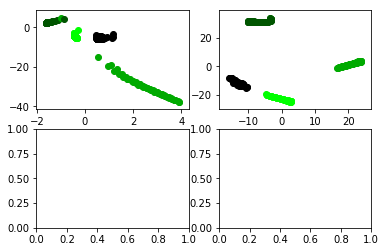

In [33]:
fig, axs = plt.subplots(2,2)

color = test_labels.cpu()*85/255
for i in range (len(test_labels)):
    axs[0,0].scatter(m[i,0],m[i,1],color=(0,color[i],0))
    axs[0,1].scatter(Y[i,0],Y[i,1],color=(0,color[i],0))
  
plt.show()

## End